In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math as mt
from scipy import stats

In [68]:
df = pd.read_csv('/Users/georgezagorsky/Desktop/Deworking/data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [69]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [70]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [72]:
def custom_hist(column : pd.Series):
    plt.figure(figsize = (6, 6))
    plt.hist(column, color = 'black', edgecolor = 'skyblue', density = True, orientation = 'vertical', label = 'hist', bins = 20)
    plt.title('histogram')
    plt.xlabel('values')
    plt.ylabel('counter of values')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 90)
    plt.minorticks_on()
    plt.grid(which='minor', color = 'black', ls = ':')
    plt.grid(which='major', color = 'black', ls = '--')
    plt.show();

def describe_columns(column, name : str):
    
    print(f'Количество пропусков в столбце : {column[name].isna().sum()}')
    print(f'Тип переменной {column.dtypes[name]}')

###  children

In [73]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


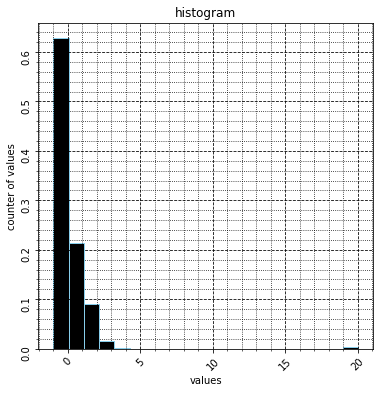

In [74]:
custom_hist(df['children'])

In [75]:
df.loc[df['children'] > 10]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,-1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль
21325,20,-601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование
21390,20,NaN,53,среднее,1,женат / замужем,0,M,компаньон,0,NaN,покупка жилой недвижимости
21404,20,-494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью


In [76]:
df = df.loc[df['children'] < 10]

In [77]:
describe_columns(df, 'children')

Количество пропусков в столбце : 0
Тип переменной int64


### days_employed

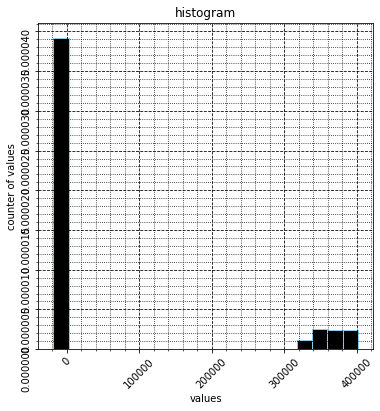

In [78]:
custom_hist(df['days_employed']);

In [79]:
24 * 60 * 60

86400

In [80]:
300000 / 86400

3.4722222222222223

In [81]:
df.loc[df['days_employed'] >200 * 10 ** 3].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью


In [82]:
df.loc[df['days_employed'] > 300 * 10 ** 3, 'days_employed'] = df.loc[df['days_employed'] > 300 * 10 ** 3, 'days_employed'] / 24

In [83]:
df.loc[df['days_employed'] > 300 * 10 ** 3]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


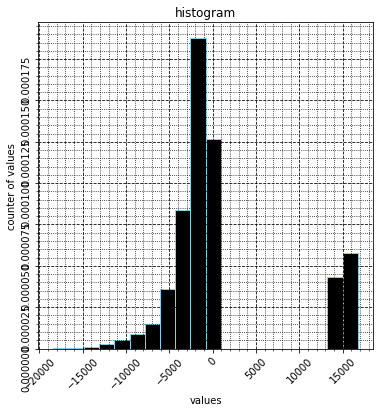

In [84]:
custom_hist(df['days_employed'])

In [85]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [86]:
df['days_employed'].corr(df['dob_years'])

0.4884066551348712

In [87]:
df['days_employed'].corr(df['total_income'])

-0.13778713915162363

In [88]:
300000 / 24

12500.0

In [90]:
12500 / 365

34.24657534246575

In [94]:
df.loc[df['days_employed'] > 10000].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,16678.380705,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,14106.331371,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,15147.853723,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,13982.569521,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью


In [98]:
df.loc[df['days_employed'] < 0, 'days_employed'] = df.loc[df['days_employed'] < 0, 'days_employed'] * (-1)

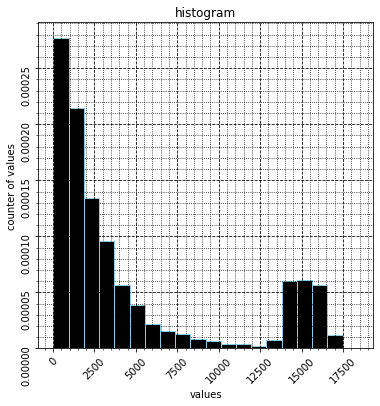

In [100]:
custom_hist(df['days_employed'])

In [102]:
df['days_employed'].describe()

count    19284.000000
mean      4645.632278
std       5358.225208
min         24.141633
25%        927.984311
50%       2196.507938
75%       5551.712316
max      18388.949901
Name: days_employed, dtype: float64

In [112]:
np.quantile(df['days_employed'], 0.9)

nan

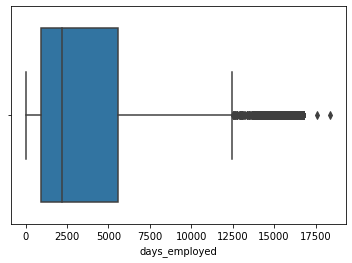

In [125]:
sns.boxplot(df['days_employed'])

In [127]:
describe_columns(df, 'days_employed')

Количество пропусков в столбце : 2165
Тип переменной float64


In [129]:
df.isna().mean()

children            0.000000
days_employed       0.100937
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100937
purpose             0.000000
dtype: float64

In [131]:
df['days_employed'].corr(df['total_income'])

-0.11523906185451398

In [134]:
df = df.loc[~df['days_employed'].isnull()]

In [136]:
df.isna().mean()

children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64

### dob_years

In [139]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


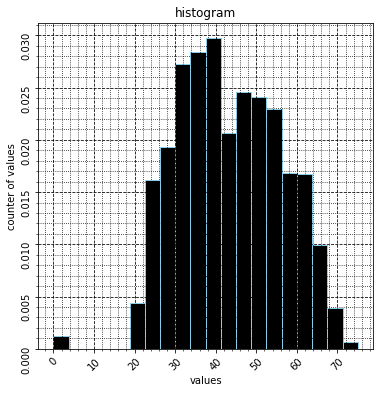

In [141]:
custom_hist(df['dob_years'])

In [145]:
df.loc[df['dob_years'] < 10].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,14439.234121,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,16577.356876,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль


In [147]:
df = df.loc[df['dob_years'] > 10]

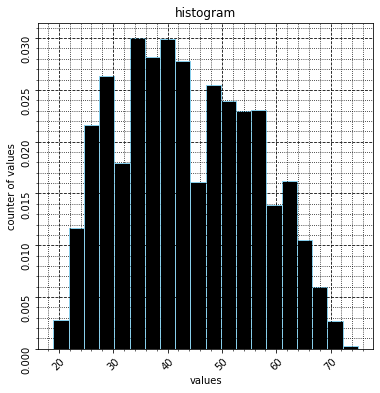

In [149]:
custom_hist(df['dob_years'])

In [151]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### education


In [153]:
df['education'] = df['education'].str.lower()

In [155]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [158]:
df.groupby('education', as_index = False).agg({'education_id' : 'count'}).sort_values('education_id', ascending = False).rename(columns = {'education_id' : 'counter_of_education'})

,education,counter_of_education
3,среднее,13583
0,высшее,4673
2,неоконченное высшее,671
1,начальное,261
4,ученая степень,6


In [161]:
grouped_education = df.groupby(['education', 'education_id'], as_index = False).agg({'children' : 'count'}).sort_values('children', ascending = False).rename(columns = {'children' : 'counter'})

In [164]:
df.groupby(['education', 'education_id'], as_index = False).agg({'children' : 'count'}).sort_values('children', ascending = False).rename(columns = {'children' : 'counter'})

,education,education_id,counter
3,среднее,1,13583
0,высшее,0,4673
2,неоконченное высшее,2,671
1,начальное,3,261
4,ученая степень,4,6


In [166]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### family_status


In [168]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [170]:
df['family_status'] = df['family_status'].str.lower()

In [172]:
df.groupby(['family_status', 'family_status_id'], as_index = False).agg({'children' : 'count'}).sort_values('children', ascending = False).rename(columns = {'children' : 'counter'})

,family_status,family_status_id,counter
3,женат / замужем,0,11053
2,гражданский брак,1,3706
4,не женат / не замужем,4,2504
0,в разводе,3,1073
1,вдовец / вдова,2,858


In [174]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### gender

In [176]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [178]:
df.loc[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [180]:
df = df.loc[df['gender'] != 'XNA']

In [182]:
len(df)

19193

In [184]:
df.groupby('gender', as_index = False).agg({'children' : 'count'}).sort_values('children', ascending = False).rename(columns = {'children' : 'counter'})

,gender,counter
0,F,12648
1,M,6545


### income_type

In [186]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'студент', 'предприниматель', 'в декрете'],
      dtype=object)

# debt

In [196]:
df['debt'].unique()

array([0, 1])

In [200]:
plt.style.use('dark_background')

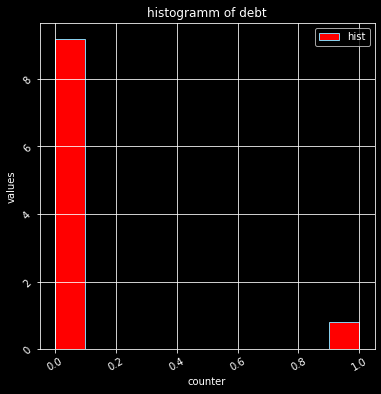

In [201]:
plt.figure(figsize = (6, 6))
plt.hist(df['debt'], density = True, orientation = 'vertical', color = 'red', edgecolor = 'skyblue', label = 'hist')
plt.legend()
plt.xlabel('counter')
plt.ylabel('values')
plt.title('histogramm of debt')
plt.xticks(rotation = 30)
plt.yticks(rotation = 45)
plt.grid()
plt.show();

In [203]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### total_income 

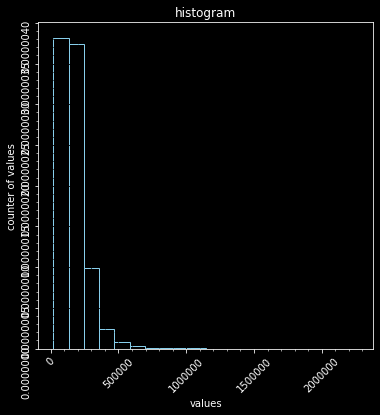

In [205]:
custom_hist(df['total_income'])

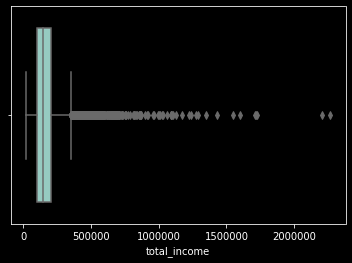

In [215]:
sns.boxplot(df['total_income']);

In [217]:
np.quantile(df['total_income'], 0.99)

518684.4516834662

In [219]:
np.quantile(df['total_income'], 0.01)

43593.80572272261

In [221]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [223]:
df = df.loc[(df['total_income'] > 43593.80572272261) & (df['total_income'] < 518684.4516834662)]

In [227]:
len(df)

18809

In [228]:
df['total_income'].describe()

count     18809.000000
mean     163073.980305
std       81389.393802
min       43598.580542
25%      103825.223754
50%      145017.937533
75%      201941.399152
max      518657.715886
Name: total_income, dtype: float64

In [229]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


## Посмотреть на зависимость между dob_years and debt

In [232]:
df.groupby('dob_years', as_index = False).agg({'debt' : 'sum'}).sort_values('debt', ascending = False).rename(columns = {'debt' : 'summa'})

,dob_years,summa
12,31,66
19,38,59
10,29,58
15,34,55
14,33,50
9,28,50
13,32,49
11,30,48
22,41,45
31,50,44


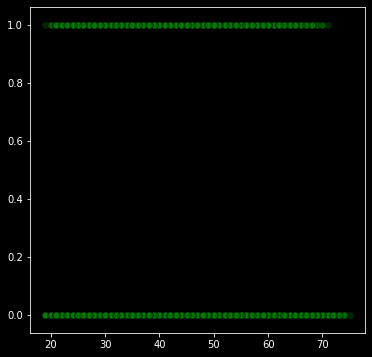

In [234]:
plt.figure(figsize = (6, 6))
plt.scatter(df['dob_years'], df['debt'], alpha = 0.3, linewidths = 1, s = 50, c = 'green', edgecolor = 'black')
plt.show()

In [236]:
def categorize_years(row):
    
    if row < 20:
        
        return 'молодые'
    elif row > 20 and row < 40:
        
        return 'средний возраст'
    
    elif row >= 40 and row < 50:
        return 'зрелый'
    
    elif row >= 50 and row < 100:
        return 'пожилые'
    

In [238]:
df['group_year'] = df['dob_years'].apply(categorize_years)

In [241]:
df['group_year'].head()

0             зрелый
1    средний возраст
2    средний возраст
3    средний возраст
4            пожилые
Name: group_year, dtype: object

In [249]:
data = df.groupby('group_year', as_index = False).agg({'debt' : 'sum', 'dob_years' : 'count'}).sort_values('debt', ascending = False).rename(columns = {'debt' : 'sum_debt'})

In [251]:
data

,group_year,sum_debt,dob_years
3,средний возраст,799,7781
2,пожилые,368,6246
0,зрелый,359,4723
1,молодые,1,13


In [258]:
data['conversion'] = data['sum_debt']/data['dob_years']

In [278]:
data['conversion'] = data['conversion'].astype('float64')
data

,group_year,sum_debt,dob_years,conversion
3,средний возраст,799,7781,0.102686
2,пожилые,368,6246,0.058918
0,зрелый,359,4723,0.076011
1,молодые,1,13,0.076923


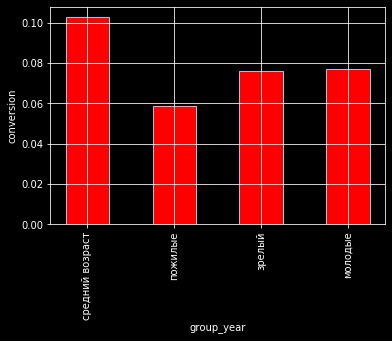

In [285]:
plt.bar(data['group_year'], data['conversion'], width = 0.5, color = 'red', edgecolor = 'skyblue', label = 'barplot')
plt.xlabel('group_year')
plt.ylabel('conversion')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [261]:
# как видим при среднем возрасте конверсия самая высокая - то есть у людей среднего возраста самый низкие выплаты на кредита

In [262]:
# нужно смотреть на конвесию

In [263]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,group_year
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,зрелый
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,средний возраст
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,средний возраст
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,средний возраст
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,пожилые


### Зависимость между education and debt

In [265]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [272]:
ddf = df.groupby('education', as_index = False).agg({'debt' : 'sum', 'dob_years' : 'count'}).sort_values('debt', ascending = False).rename(columns = {'debt' : 'sum_debt'})

In [274]:
ddf

,education,sum_debt,dob_years
3,среднее,1197,13359
0,высшее,244,4533
2,неоконченное высшее,62,660
1,начальное,28,251
4,ученая степень,0,6


In [276]:
ddf['conversion'] = ddf['sum_debt'] / ddf['dob_years']
ddf

,education,sum_debt,dob_years,conversion
3,среднее,1197,13359,0.089603
0,высшее,244,4533,0.053827
2,неоконченное высшее,62,660,0.093939
1,начальное,28,251,0.111554
4,ученая степень,0,6,0.000000


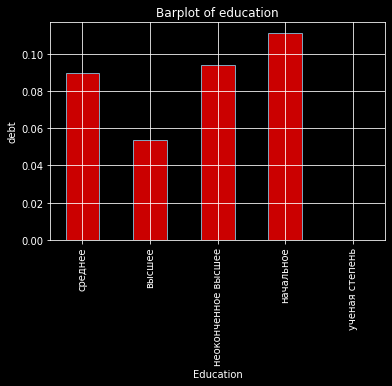

In [287]:
plt.bar(ddf['education'], ddf['conversion'],alpha = 0.8, width = 0.5, color = 'red', edgecolor = 'skyblue')
plt.title('Barplot of education')
plt.xlabel('Education')
plt.ylabel('debt')
plt.xticks(rotation = 90)
plt.grid()
plt.show();

In [289]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,group_year
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,зрелый
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,средний возраст
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,средний возраст
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,средний возраст
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,пожилые


### total_income and debt corr - зависимость

In [291]:
df['total_income'] = df['total_income'].astype('int64')

In [293]:
df['total_income'].describe()

count     18809.000000
mean     163073.479345
std       81389.397339
min       43598.000000
25%      103825.000000
50%      145017.000000
75%      201941.000000
max      518657.000000
Name: total_income, dtype: float64

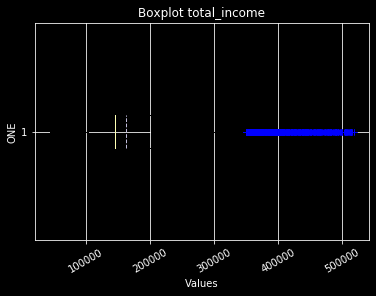

In [297]:
plt.boxplot(df['total_income'], sym = 'b+', meanline = True, showmeans = True, vert = False)
plt.title('Boxplot total_income')
plt.xlabel('Values')
plt.ylabel('ONE')
plt.xticks(rotation = 30)
plt.grid()
plt.show();

In [299]:
def categorize_total_income(digit : int):
    
    if digit > 43598.000000 and digit < 103825:
        return 'Низкий доход'
    
    elif digit >= 103825 and digit < 145017.000000:
        return 'Достаточный доход'
    
    elif digit >= 145017 and digit < 201941.000000:
        return 'Доход выше среднего'
    
    elif digit >= 201941.000000 and digit < 518657.000000:
        return 'Высокий доход'

In [301]:
df['group_total_income'] = df['total_income'].apply(categorize_total_income)

In [302]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,group_year,group_total_income
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,зрелый,Высокий доход
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний возраст,Достаточный доход
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний возраст,Доход выше среднего
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,средний возраст,Высокий доход
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,пожилые,Доход выше среднего


In [305]:
data = df.groupby('group_total_income', as_index = False).agg({'debt' : 'sum', 'dob_years' : 'count'}).sort_values('debt', ascending = False).rename(columns = {'debt' : 'sum_debt', 'dob_years' : 'count_debt'})

In [307]:
data

,group_total_income,sum_debt,count_debt
2,Доход выше среднего,414,4702
1,Достаточный доход,409,4702
3,Низкий доход,374,4701
0,Высокий доход,333,4702


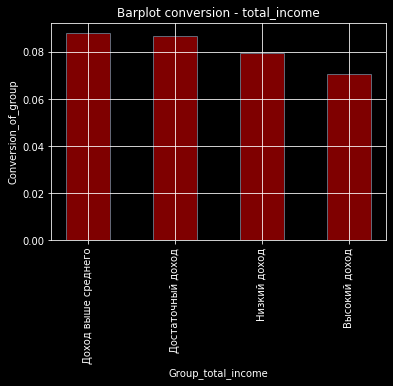

In [309]:
data['conversion'] = data['sum_debt'] / data['count_debt']
plt.bar(data['group_total_income'], data['conversion'], color = 'red',alpha = 0.5, edgecolor = 'skyblue', width = 0.5, label = 'barplot')
plt.title('Barplot conversion - total_income')
plt.xlabel('Group_total_income')
plt.ylabel('Conversion_of_group')
plt.xticks(rotation = 90)
plt.grid()
plt.show();

In [314]:
data# true

,group_total_income,sum_debt,count_debt,conversion
2,Доход выше среднего,414,4702,0.088048
1,Достаточный доход,409,4702,0.086984
3,Низкий доход,374,4701,0.079558
0,Высокий доход,333,4702,0.070821


In [313]:
len(df.loc[(df['total_income'] > 44000) & (df['total_income'] < 104000)])

4713

### Добавить категоризацию по данным из purpose - посмотреть влияет ли это на выплаты

In [316]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,group_year,group_total_income
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,зрелый,Высокий доход
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средний возраст,Достаточный доход
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средний возраст,Доход выше среднего
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,средний возраст,Высокий доход
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,пожилые,Доход выше среднего


In [326]:
def categorize_purpose(row):
    
    if 'жиль' in row:
        return 'Приобретение жилья'
    elif 'автомоб' in row:
        return 'Покупка атомобиля'
    elif 'образов' in row:
        return 'Образование'
    elif 'свадьб' in row:
        return 'Проведение свадьбы'
    elif 'недвиж' in row:
        return 'Недвижимость'
    else:
        return 'unknown'

In [322]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'получение образования', 'заняться образованием',
       'сделка с подержанным автомобилем', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее образование',
       'покупка жилья для сдачи

In [327]:
df['categorize_purpose'] = df['purpose'].apply(categorize_purpose)

In [330]:
df.head(1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,group_year,group_total_income,categorize_purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,зрелый,Высокий доход,Приобретение жилья


In [332]:
data = df.groupby(['categorize_purpose'], as_index = False).agg({'debt' : 'sum', 'dob_years' : 'count'}).sort_values('debt', ascending = False).rename(columns = {'debt' : 'debt_sum', 'dob_years' : 'counter_debt'})

In [334]:
data

,categorize_purpose,debt_sum,counter_debt
0,Недвижимость,423,5573
2,Покупка атомобиля,357,3796
1,Образование,325,3494
3,Приобретение жилья,276,3905
4,Проведение свадьбы,150,2041


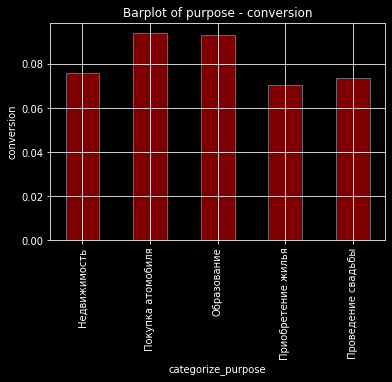

In [335]:
data['conversion'] = data['debt_sum'] / data['counter_debt']
plt.bar(data['categorize_purpose'], data['conversion'], alpha = 0.5, color = 'red', edgecolor = 'skyblue', width = 0.5, label = 'barplot')
plt.title('Barplot of purpose - conversion')
plt.xlabel('categorize_purpose')
plt.ylabel('conversion')
plt.xticks(rotation = 90)
plt.grid()
plt.show();